In [1]:
import os
os.chdir("../src")

+-----------------------------------------+--------+--------------------------+------------------------------------+
| Workload                                |  Chip  | Throughput (samples/sec) | Operational Intensity (FLOPs/byte) |
+-----------------------------------------+--------+--------------------------+------------------------------------+
| resnet50                                | tpuv1  |          332.59          |              2587.93               |
| resnet50-with-50pct-sparse-8bit-weights | tpuv1  |          695.50          |              5175.87               |
| bert-base-uncased                       | tpuv1  |          33.03           |              8131.36               |
| resnet50                                | tpuv4i |          483.82          |              2587.93               |
| resnet50-with-50pct-sparse-8bit-weights | tpuv4i |          967.65          |              5175.87               |
| bert-base-uncased                       | tpuv4i |          45

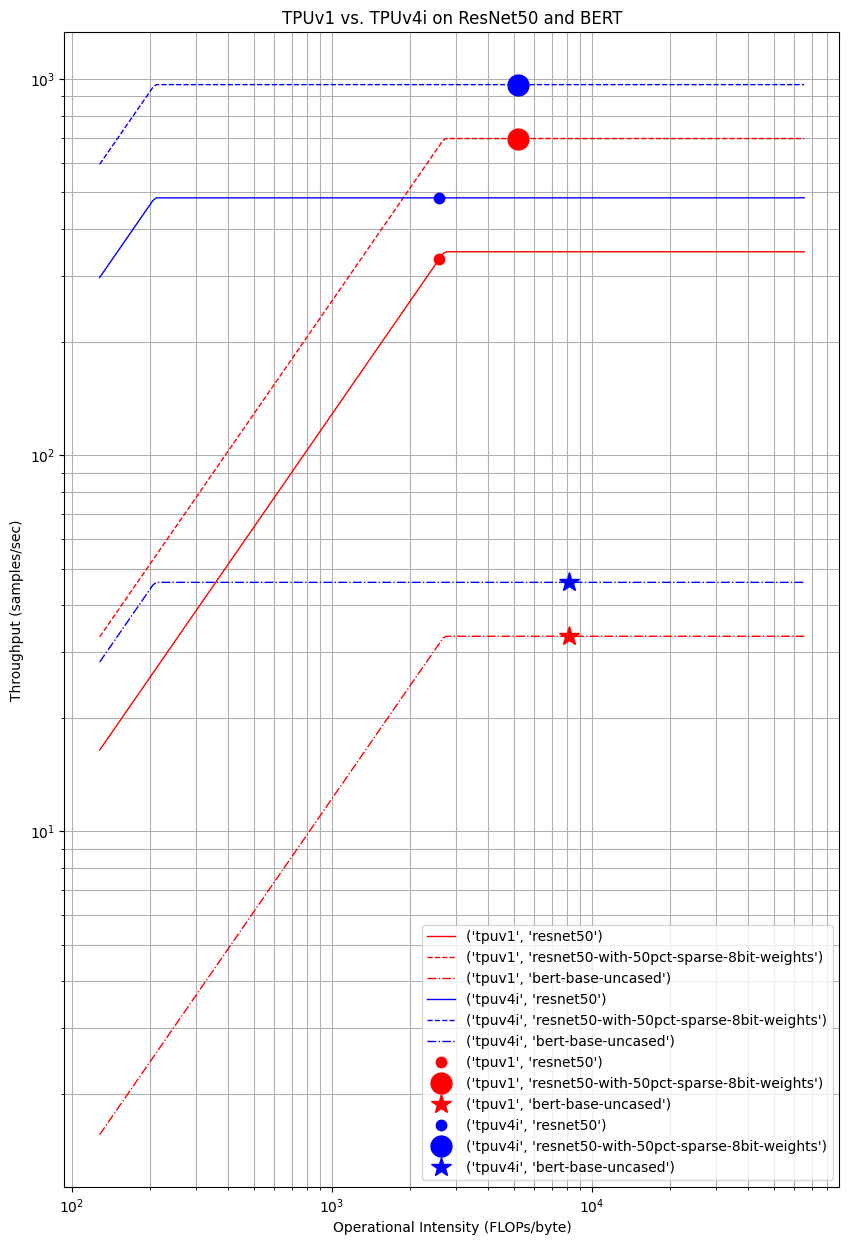

In [2]:
import plot_util
import Chip as c
import Workload as w

# Numbers obtained from Table 1 in https://ieeexplore.ieee.org/abstract/document/9499913.
chips = {
    "tpuv1": c.Chip(
        compute=92e12,
        mem_bw=34e9,
        color='r',
    ),
    "tpuv4i": c.Chip(
        compute=128e12,
        mem_bw=614e9,
        color='b',
    ),
}

# Numbers derived from thop profiling of torchvision and transformers models.
# Assumptions:
# - weights loaded exactly once from memory (assumes unlimited on-chip memory)
# - all intermediate activations stored on chip (assumes unlimited on-chip memory)
# - inference
# - batch 64
# - input activations are free
batch = 64
workloads = {
    "resnet50": w.Workload(
        compute_req=4133742592 * batch,
        mem_movement_req=25557032 * 4,  # 32-bit weights
        units_of_work="samples",
        line='-',
        point='.',
    ),
    "resnet50-with-50pct-sparse-8bit-weights": w.Workload(
        compute_req=4133742592 * batch * 0.5, # 50% sparsity
        mem_movement_req=25557032 * 1,  # 8-bit weights
        units_of_work="samples",
        line='--',
        point='o',
    ),
    "bert-base-uncased": w.Workload(
        compute_req=43526455296 * batch,
        mem_movement_req=85646592 * 4,  # 32-bit weights
        units_of_work="samples",
        line='-.',
        point='*',
    ),
}

plot_util.plot_scenario(
    chips=chips,
    workloads=workloads,
    title="TPUv1 vs. TPUv4i on ResNet50 and BERT",
)